<a href="https://colab.research.google.com/github/ManuelBagasina/DATCapstone/blob/Manuel/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
# !pip install asyncpraw
# !pip install yfinance==0.2.54
# !pip install fredapi
# !pip install newsapi-python

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.4/196.4 kB 4.0 MB/s eta 0:00:00


In [2]:
#Basic Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#Yahoo Finance
import yfinance as yf

# Firm Selection

In [3]:
#Select the frim for the prediction
firm = "AAPL"

# Apple -> AAPL
# Microsoft -> MSFT
# Nvidia -> NVDA
# Adobe -> ADVE
# Tesla -> TSLA
# Amazon -> AMZN
# Netflix -> NFLX
# Meta -> META
# Alphabet -> GOOGL

In [4]:
# Get the firm's full name
def get_firm_name(ticker):
    stock = yf.Ticker(ticker)
    return stock.info["longName"]  # return Full name

firm_name = get_firm_name(firm)
print(firm_name)  # Full name

Apple Inc.


# Data Collection

### Stock Price

In [6]:
# Fetch data for a single stock
ticker = firm
stock = yf.Ticker(ticker)

# Get historical data
data = stock.history(period="5y") #I just set the period 5 years since yahoo finance api offers free microeconomic data about past 5 years

# Convert to Dataframe
df_stock = pd.DataFrame(data)

# Display
df_stock

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-02-19 00:00:00-05:00,77.657293,78.766338,77.657293,78.535789,93984000,0.0,0.0
2020-02-20 00:00:00-05:00,78.295541,78.785750,77.222897,77.730095,100566000,0.0,0.0
2020-02-21 00:00:00-05:00,77.322381,77.766488,75.351829,75.970657,129554000,0.0,0.0
2020-02-24 00:00:00-05:00,72.138754,73.818089,70.190042,72.362015,222195200,0.0,0.0
2020-02-25 00:00:00-05:00,73.034266,73.417696,69.437761,69.910980,230673600,0.0,0.0
...,...,...,...,...,...,...,...
2025-02-12 00:00:00-05:00,231.199997,236.960007,230.679993,236.869995,45243300,0.0,0.0
2025-02-13 00:00:00-05:00,236.910004,242.339996,235.570007,241.529999,53614100,0.0,0.0
2025-02-14 00:00:00-05:00,241.250000,245.550003,240.990005,244.600006,40896200,0.0,0.0


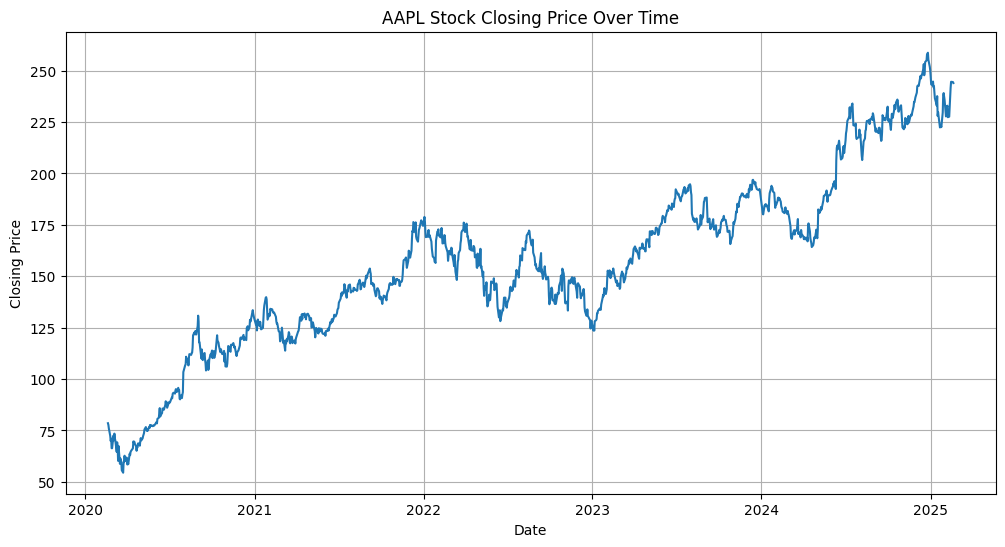

In [7]:
# Plot the closing price
plt.figure(figsize=(12, 6))
plt.plot(df_stock['Close'])
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title(f'{firm} Stock Closing Price Over Time')
plt.grid(True)
plt.show()


### Macroeconomic Indicators

In [11]:
from fredapi import Fred

# API key is from https://fred.stlouisfed.org
api_key = "d6ed01a1d424d730c0a92819f41f4c79"
fred = Fred(api_key=api_key)

# Macroeconomic Indicators and Their FRED Codes
# Indicators can be added or revised
indicators = {
    "GDP (Billions USD)": "GDP",
    "Unemployment Rate (%)": "UNRATE",
    "Producer Price Index (PPI)": "PPIACO",
    "Retail Sales (Millions USD)": "RSAFS",
    "Industrial Production Index": "INDPRO",
    "Housing Starts (Thousands)": "HOUST",
    "Personal Consumption Expenditures (PCE)": "PCE",
    "Trade Balance (Billions USD)": "BOPGSTB",
    "M2 Money Supply (Billions USD)": "M2",
    "Consumer Confidence Index": "UMCSENT",
}

# Fetch Data for Each Indicator
data = {}
for name, code in indicators.items():
    data[name] = fred.get_series(code)

# Convert to DataFrame
df_macro = pd.DataFrame(data)

# Display the data
df_macro


,GDP (Billions USD),Unemployment Rate (%),Producer Price Index (PPI),Retail Sales (Millions USD),Industrial Production Index,Housing Starts (Thousands),Personal Consumption Expenditures (PCE),Trade Balance (Billions USD),M2 Money Supply (Billions USD),Consumer Confidence Index
1913-01-01,NaN,NaN,12.100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1913-02-01,NaN,NaN,12.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1913-03-01,NaN,NaN,12.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1913-04-01,NaN,NaN,12.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1913-05-01,NaN,NaN,11.900,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2024-09-01,NaN,4.1,252.682,716388.0,102.5873,1355.0,20044.1,-84333.0,NaN,70.1
2024-10-01,29700.58,4.1,253.081,720393.0,102.1219,1344.0,20134.5,-74153.0,NaN,70.5
2024-11-01,NaN,4.2,253.229,725079.0,101.9736,1305.0,20253.6,-78940.0,NaN,71.8
2024-12-01,NaN,4.1,253.590,730300.0,102.9833,1515.0,20387.2,-98431.0,NaN,74.0


### Microeconomic Indicators

In [12]:
# Fetch company data
stock = yf.Ticker(firm)

# Fetch Financial Statements
financials = stock.financials.T  # Income Statement (Revenue, Profit, Margins)
balance_sheet = stock.balance_sheet.T  # Assets, Liabilities, Equity
cash_flow = stock.cashflow.T  # Cash from Operations, Investments, Financing

# Convert to DataFrame
df_financials = pd.DataFrame(financials)
df_balance_sheet = pd.DataFrame(balance_sheet)
df_cash_flow = pd.DataFrame(cash_flow)

df_micro = pd.concat([df_financials, df_balance_sheet, df_cash_flow], axis=1)
df_micro

,Tax Effect Of Unusual Items,Tax Rate For Calcs,Normalized EBITDA,Net Income From Continuing Operation Net Minority Interest,Reconciled Depreciation,Reconciled Cost Of Revenue,EBITDA,EBIT,Net Interest Income,Interest Expense,...,Change In Inventory,Change In Receivables,Changes In Account Receivables,Other Non Cash Items,Stock Based Compensation,Deferred Tax,Deferred Income Tax,Depreciation Amortization Depletion,Depreciation And Amortization,Net Income From Continuing Operations
2024-09-30,0.0,0.241,134661000000.0,93736000000.0,11445000000.0,210352000000.0,134661000000.0,123216000000.0,NaN,NaN,...,-1046000000.0,-5144000000.0,-3788000000.0,-2266000000.0,11688000000.0,NaN,NaN,11445000000.0,11445000000.0,93736000000.0
2023-09-30,0.0,0.147,125820000000.0,96995000000.0,11519000000.0,214137000000.0,125820000000.0,114301000000.0,-183000000.0,3933000000.0,...,-1618000000.0,-417000000.0,-1688000000.0,-2227000000.0,10833000000.0,NaN,NaN,11519000000.0,11519000000.0,96995000000.0
2022-09-30,0.0,0.162,130541000000.0,99803000000.0,11104000000.0,223546000000.0,130541000000.0,119437000000.0,-106000000.0,2931000000.0,...,1484000000.0,-9343000000.0,-1823000000.0,1006000000.0,9038000000.0,895000000.0,895000000.0,11104000000.0,11104000000.0,99803000000.0
2021-09-30,0.0,0.133,123136000000.0,94680000000.0,11284000000.0,212981000000.0,123136000000.0,111852000000.0,198000000.0,2645000000.0,...,-2642000000.0,-14028000000.0,-10125000000.0,-4921000000.0,7906000000.0,-4774000000.0,-4774000000.0,11284000000.0,11284000000.0,94680000000.0
2020-09-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,890000000.0,2873000000.0,...,NaN,NaN,NaN,NaN,NaN,-215000000.0,-215000000.0,NaN,NaN,NaN


In [13]:
df_micro.columns.tolist() #We can choose the moste relevent indicators

['Tax Effect Of Unusual Items',
 'Tax Rate For Calcs',
 'Normalized EBITDA',
 'Net Income From Continuing Operation Net Minority Interest',
 'Reconciled Depreciation',
 'Reconciled Cost Of Revenue',
 'EBITDA',
 'EBIT',
 'Net Interest Income',
 'Interest Expense',
 'Interest Income',
 'Normalized Income',
 'Net Income From Continuing And Discontinued Operation',
 'Total Expenses',
 'Total Operating Income As Reported',
 'Diluted Average Shares',
 'Basic Average Shares',
 'Diluted EPS',
 'Basic EPS',
 'Diluted NI Availto Com Stockholders',
 'Net Income Common Stockholders',
 'Net Income',
 'Net Income Including Noncontrolling Interests',
 'Net Income Continuous Operations',
 'Tax Provision',
 'Pretax Income',
 'Other Income Expense',
 'Other Non Operating Income Expenses',
 'Net Non Operating Interest Income Expense',
 'Interest Expense Non Operating',
 'Interest Income Non Operating',
 'Operating Income',
 'Operating Expense',
 'Research And Development',
 'Selling General And Administr

### Sentiment Analysis

##### yhfinance web scrapping

In [14]:
#Yahoo Finance web scrapping initialization
import requests
from bs4 import BeautifulSoup

url = f"https://finance.yahoo.com/quote/{firm}/news"

headers = {
    "User-Agent": "Mozilla/5.0"
}

response = requests.get(url, headers=headers)
soup = BeautifulSoup(response.text, "html.parser")

# print(soup.prettify())

In [15]:
# Find Articles Title
articles_title = soup.find_all("h3", class_="clamp")

# Find Posted times
articles_time = soup.find_all(class_="publishing yf-1weyqlp")

# Find Articles Summaries
articles_summary = soup.find_all("p", class_="yf-82qtw3")

# Make list for titles
article_title_list = []
for article_title in articles_title:
    article_title_list.append(article_title.text)

# Make list for times
article_time_list = []
for article_time in articles_time:
    article_time_list.append(article_time.text.split("•")[1].strip())

# Make list for summaries
article_summary_list = []
for article_summary in articles_summary:
    article_summary_list.append(article_summary.text)

#Dataframe
yh_article_titles_df = pd.DataFrame({"Time": article_time_list,
                                     "Title": article_title_list,
                                     "Summary": article_summary_list})

yh_article_titles_df

,Time,Title,Summary
0,3 hours ago,iPhone SE 4 could be a huge moneymaker for Apple,It pays to sell a cheap iPhone if you are tech...
1,19 hours ago,Apple purges apps without contact info from EU...,A change requiring app developers to disclose ...
2,42 minutes ago,Top Companies for Innovation,Apple has the highest score for innovation am...
3,42 minutes ago,3 Reasons to Buy Apple Stock Like There's No T...,Even without much growth to speak of for the l...
4,2 hours ago,Warren Buffett Just Gave Investors a $46 Milli...,Berkshire Hathaway (NYSE: BRK.A)(NYSE: BRK.B) ...
5,2 hours ago,Apple Stock's Premium Valuation Puts Investors...,Slowing growth and a reliance on intangible va...
6,3 hours ago,5 Things to Know Before the Stock Market Opens...,"News of the day for Feb. 19, 2025"
7,3 hours ago,Apple to launch new lower-cost iPhone to captu...,"The fourth generation of the lower-cost model,..."
8,3 hours ago,These Stocks Are Moving the Most Today: Nvidia...,Bumble stock plunges following an earnings mis...
9,4 hours ago,Apple says UK regulator's remedy options on mo...,Apple has told Britain's competition regulator...


02.10 Ri-on: I successfully set up a system to search for articles related to a specified company and extract the title, posting time, and summary in the yahoo finance website. However, the scraping currently only captures the articles displayed at the top of the webpage. To retrieve older data, further improvements are needed.

In [16]:
import requests
import pandas as pd
from datetime import datetime

def get_yahoo_news(firm, max_articles=1000):                          # adjust max articles here
    base_url = "https://query2.finance.yahoo.com/v1/finance/search"
    articles = []
    offset = 0

    while len(articles) < max_articles:
        params = {
            "q": firm,
            "news_count": min(100, max_articles - len(articles)),  # API max per call
            "offset": offset,
            "lang": "en-US",
            "region": "US"
        }

        response = requests.get(
            url=base_url,
            params=params,
            headers={"User-Agent": "Mozilla/5.0"}
        )

        if response.status_code != 200 or not response.json().get('news'):
            break

        for article in response.json()['news']:
            # Use get method with a default value to handle missing 'summary' key
            summary = article.get('summary', 'N/A')
            articles.append({
                "Time": datetime.fromtimestamp(article['providerPublishTime']).strftime('%Y-%m-%d %H:%M'),
                "Title": article['title'],
                "Summary": summary,  # Assign the extracted or default summary
                "Source": article['publisher']
            })

        offset += params["news_count"]

    return pd.DataFrame(articles)[:max_articles]

# Usage
yh_article_df = get_yahoo_news(firm) # specify the firm parameter to get news of the specified firm.
yh_article_df

,Time,Title,Summary,Source
0,2025-02-19 15:00,Top Companies for Innovation,N/A,The Wall Street Journal
1,2025-02-19 15:00,3 Reasons to Buy Apple Stock Like There's No T...,N/A,Motley Fool
2,2025-02-19 13:44,Market Chatter: Apple Warns Against UK Remedie...,N/A,MT Newswires
3,2025-02-19 13:05,Warren Buffett Just Gave Investors a $46 Milli...,N/A,Motley Fool
4,2025-02-19 13:01,Apple Stock's Premium Valuation Puts Investors...,N/A,GuruFocus.com
...,...,...,...,...
995,2025-02-19 13:05,Warren Buffett Just Gave Investors a $46 Milli...,N/A,Motley Fool
996,2025-02-19 13:01,Apple Stock's Premium Valuation Puts Investors...,N/A,GuruFocus.com
997,2025-02-19 12:34,5 Things to Know Before the Stock Market Opens...,N/A,Investopedia
998,2025-02-19 12:13,iPhone SE 4 could be a huge moneymaker for Apple,N/A,Yahoo Finance Video


this method uses API instead of webscraping, but we're still limited to the most recent articles. Yahoo api doesnt allow for more than 5 years


### TheNewsAPI
testing out different news API's

In [18]:
import requests
import pandas as pd

api_key = 'VZnchCBfCg9fBUkfCR2llXDWIiTKRaK2iAIaboO5'

def get_historical_news(firm, years_back=5):
    """Retrieve news articles from past specified years using TheNewsAPI"""
    end_date = pd.Timestamp.now().strftime('%Y-%m-%d')
    start_date = pd.Timestamp.now() - pd.DateOffset(years=years_back)
    start_date = start_date.strftime('%Y-%m-%d')

    all_articles = []
    page = 1

    while True:
        params = {
            'api_token': api_key,
            'q': firm,
            'search_in': 'title,description',
            'from': start_date,
            'to': end_date,
            'language': 'en',
            'sort': 'published_at',
            'order': 'desc',
            'page': page,
            'domains': 'reuters.com,bloomberg.com,finance.yahoo.com'
        }

        response = requests.get('https://api.thenewsapi.com/v1/news/all', params=params)

        if response.status_code != 200:
            print(f"Error: {response.status_code}")
            break

        data = response.json()

        if not data['data']:
            break

        all_articles.extend(data['data'])
        page += 1

        # Free tier limit: 100 results
        if len(all_articles) >= 100 or page > 5:
            break

    return pd.DataFrame(all_articles)[['published_at', 'title', 'description', 'url']]

# Usage - get Negirmtflix articles from past 5 years
news_df = get_historical_news(firm_name, years_back=5)
print(f"Found {len(news_df)} articles")
news_df.head()


Found 15 articles


,published_at,title,description,url
0,2025-02-19T14:55:41.000000Z,Analysis-European results-day share volatility...,Unusually high volatility in the shares of Eur...,https://finance.yahoo.com/news/analysis-europe...
1,2025-02-19T14:48:52.000000Z,Penumbra Stock Surges As Thrombectomy Sales Dr...,Penumbra stock gapped up Wednesday after the m...,https://www.investors.com/news/technology/penu...
2,2025-02-19T14:47:05.000000Z,Rivian Earnings Are Due. Can The EV Startup Fo...,"Rivian earnings for Q4 are due late Thursday, ...",https://www.investors.com/news/rivian-earnings...
3,2025-02-19T14:45:49.000000Z,SolarEdge Spikes 35% As Improved Margins Offse...,SolarEdge Technologies missed earnings estimat...,https://www.investors.com/news/solaredge-earni...
4,2025-02-19T14:42:44.000000Z,Trump's antitrust cops offer new signal they w...,President Trump’s new Federal Trade Commission...,https://finance.yahoo.com/news/trumps-antitrus...


##### Reddit seb scrapping

In [21]:
import asyncpraw #Library for Reddit API
import asyncio # for async environment
import nest_asyncio # Preventing async loop error
import re

nest_asyncio.apply() # Preventing async loop error

#API certification
async def fetch_reddit():
    reddit = asyncpraw.Reddit(
        client_id="ardOQiL60Y2K7KF0V_WMGA",
        client_secret="oyNdfuaDlVeSwV7qmgSRP5bFcYru-Q",
        user_agent="my_reddit_scraper"
    )

    subreddit = await reddit.subreddit(f"{re.sub(r'[^A-Za-z0-9 ]+', '', firm_name.split(' ')[0]) }")  # await for async environment

    # list
    data = []

    async for post in subreddit.hot(limit=10):  # Top 10 posts
        data.append({
            "Title": post.title,
            "Score": post.score,
            "URL": post.url,
            "Content": post.selftext[:500] #Limit 500 words. revise possible
        })

    await reddit.close()  # await for api calling

    # DataFrame
    df = pd.DataFrame(data)
    return df

# Execution
loop = asyncio.get_event_loop() # Preventing async loop error
loop.run_until_complete(fetch_reddit())

,Title,Score,URL,Content
0,"Daily Advice Thread - February 19, 2025",2,https://www.reddit.com/r/apple/comments/1it2wd...,Welcome to the Daily Advice Thread for /r/Appl...
1,[tim cook] Get ready to meet the newest member...,37,https://x.com/tim_cook/status/1890068457825394918,
2,Wireless reverse charging being tested in the ...,345,https://9to5mac.com/2025/02/19/wireless-revers...,
3,iPhone 17 Pro Models Rumored to Feature Alumin...,1009,https://www.macrumors.com/2025/02/18/iphone-17...,
4,EU pushes forward with Apple antitrust investi...,136,https://appleinsider.com/articles/25/02/18/eu-...,
5,Aptoide Alternative App Store Launches in the ...,102,https://www.macrumors.com/2025/02/18/apptoide-...,
6,China fighting to stop Apple's supply chain ex...,643,https://appleinsider.com/articles/25/02/18/chi...,
7,Apps That Didn't Add 'Trader' Contact Info in ...,286,https://www.macrumors.com/2025/02/18/european-...,
8,Major League Soccer kicks off 30th season this...,158,https://www.apple.com/newsroom/2025/02/major-l...,
9,iPhone Design to Change 'Significantly' This Year,1816,https://www.macrumors.com/2025/02/17/iphone-de...,


02.10 Ri-on: Added draft for web scrapping reddit posts

##### Data Merging (Sentiment Analysis)

##### Text Quantification

### Data Merging

# EDA

# Feature Engineering

# Modeling

# Evaluation